# pvlib-Python Forecasting (Albuquerque, NM)
### Install Standard Release 

In [1]:
# pip Upgrade
!pip install --upgrade pip

Requirement already up-to-date: pip in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (20.1.1)


In [2]:
# Package from the Python Package Index
!pip install pvlib

# Module netCDF4 was not found 
!pip install netCDF4

# Module siphon was not found
!pip install siphon

# 4/20/2020: version 1.1.2 released. Code optimization, fix logic so only_use_cftime_datimes=False works as expected (issues #158 and #165). 
!pip install cftime==1.1.2


# Try to save Excel
!pip install openpyxl

In [3]:
# Make basic imports and then set the location and time range data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pytz
import seaborn as sns; sns.set_color_codes()
import datetime

# Import pvlib forecast models
from pvlib.forecast import GFS, NAM, NDFD, HRRR, RAP
from pvlib import solarposition
from pvlib.location import Location
from matplotlib.pyplot import figure
%matplotlib inline

# Specify Location (Albuiquerque, NM)
latitude, longitude, tz = 35, -106.6, 'US/Mountain'

# Specify time range
start = pd.Timestamp(datetime.date.today(), tz=tz)
end = start + pd.Timedelta(days=1)
irrad_vars = ['ghi','dni','dhi']

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pvlib/forecast.py:19: UserWarning: The forecast module algorithms and features are highly experimental. The API may change, the functionality may be consolidated into an io module, or the module may be separated into its own package.
  'The forecast module algorithms and features are highly experimental. '


### Create Model

In [4]:
# GFS model, defaults to 0.5 degree resolution
# 0.25 deg available 
model = GFS() 

# Retrive data.returns panda.DataFrame object
raw_data = model.get_data(latitude, longitude, start, end)
print(raw_data.head())

                           Temperature_surface  Wind_speed_gust_surface  \
2020-06-19 06:00:00-06:00           293.213806                 8.676660   
2020-06-19 09:00:00-06:00           289.272644                 3.932318   
2020-06-19 12:00:00-06:00           287.876221                 5.351577   
2020-06-19 15:00:00-06:00           302.100006                 3.600000   
2020-06-19 18:00:00-06:00           312.583221                 8.325678   

                           Total_cloud_cover_boundary_layer_cloud_Mixed_intervals_Average  \
2020-06-19 06:00:00-06:00                                                0.0                
2020-06-19 09:00:00-06:00                                                0.0                
2020-06-19 12:00:00-06:00                                                0.0                
2020-06-19 15:00:00-06:00                                                0.0                
2020-06-19 18:00:00-06:00                                                0.0        

### Process Data with pvlib

In [5]:
# Process this data before using it with pvlib
data = raw_data

# Rename the columns according the key/value pairs in model.variables.
data = model.rename(data)

# Convert temperature
data['temp_air'] = model.kelvin_to_celsius(data['temp_air'])

# Convert wind components to wind speed
data['wind_speed'] = model.uv_to_speed(data)

# Calculate irradiance estimates from cloud cover.
irrad_data = model.cloud_cover_to_irradiance(data['total_clouds'])
data = data.join(irrad_data, how='outer')

# Keep only the final data
data = data[model.output_variables]

print(data.head())

                            temp_air  wind_speed         ghi         dni  \
2020-06-19 06:00:00-06:00  20.063812    5.884893    0.402484    0.000000   
2020-06-19 09:00:00-06:00  16.122650    3.080471  523.946401  698.891855   
2020-06-19 12:00:00-06:00  14.726227    5.092391  936.363937  712.448625   
2020-06-19 15:00:00-06:00  28.950012    3.523898  873.667649  721.418978   
2020-06-19 18:00:00-06:00  39.433228    6.866609  376.082879  621.045623   

                                  dhi  total_clouds  low_clouds  mid_clouds  \
2020-06-19 06:00:00-06:00    0.402484           0.0         0.0         0.0   
2020-06-19 09:00:00-06:00  117.747131           0.0         0.0         0.0   
2020-06-19 12:00:00-06:00  261.736739           0.0         0.0         0.0   
2020-06-19 15:00:00-06:00  230.427267           0.0         0.0         0.0   
2020-06-19 18:00:00-06:00   98.009769           0.0         0.0         0.0   

                           high_clouds  
2020-06-19 06:00:00-06:00  

### GFS'S Class

In [6]:
# process_data method combines these steps in a single function
data = model.process_data(raw_data)
print(data.head())

# Implement their own process_data methods on inherited classes or implement similar stand-alone functions
# Also implement a get_processed_data() method that combines the get_data() and process_data() calls
data = model.get_processed_data(latitude, longitude, start, end)
print(data.head())

                            temp_air  wind_speed         ghi         dni  \
2020-06-19 06:00:00-06:00  20.063812    5.884893    0.402484    0.000000   
2020-06-19 09:00:00-06:00  16.122650    3.080471  523.946401  698.891855   
2020-06-19 12:00:00-06:00  14.726227    5.092391  936.363937  712.448625   
2020-06-19 15:00:00-06:00  28.950012    3.523898  873.667649  721.418978   
2020-06-19 18:00:00-06:00  39.433228    6.866609  376.082879  621.045623   

                                  dhi  total_clouds  low_clouds  mid_clouds  \
2020-06-19 06:00:00-06:00    0.402484           0.0         0.0         0.0   
2020-06-19 09:00:00-06:00  117.747131           0.0         0.0         0.0   
2020-06-19 12:00:00-06:00  261.736739           0.0         0.0         0.0   
2020-06-19 15:00:00-06:00  230.427267           0.0         0.0         0.0   
2020-06-19 18:00:00-06:00   98.009769           0.0         0.0         0.0   

                           high_clouds  
2020-06-19 06:00:00-06:00  

## Cloud Cover & Radiation

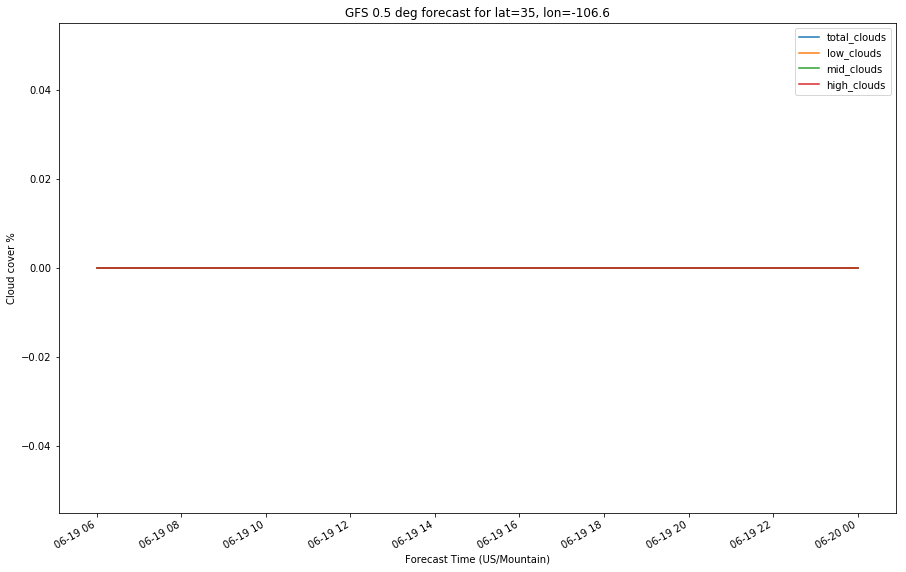

In [7]:
# Plot cloud cover percentages
cloud_vars = ['total_clouds', 'low_clouds','mid_clouds', 'high_clouds']
data[cloud_vars].plot(figsize=(15,10));
plt.ylabel('Cloud cover %');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('GFS 0.5 deg forecast for lat={}, lon={}'.format(latitude, longitude));
plt.legend();

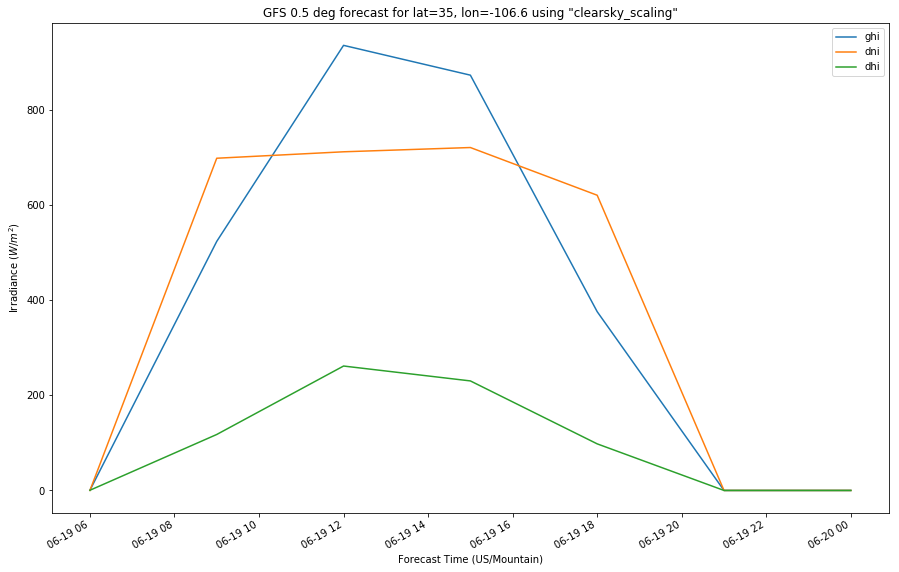

In [8]:
# Plot irradiance data
data = model.rename(raw_data)
irrads = model.cloud_cover_to_irradiance(data['total_clouds'], how='clearsky_scaling')
irrads.plot(figsize=(15,10));
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('GFS 0.5 deg forecast for lat={}, lon={} using "clearsky_scaling"'.format(latitude, longitude));
plt.legend();

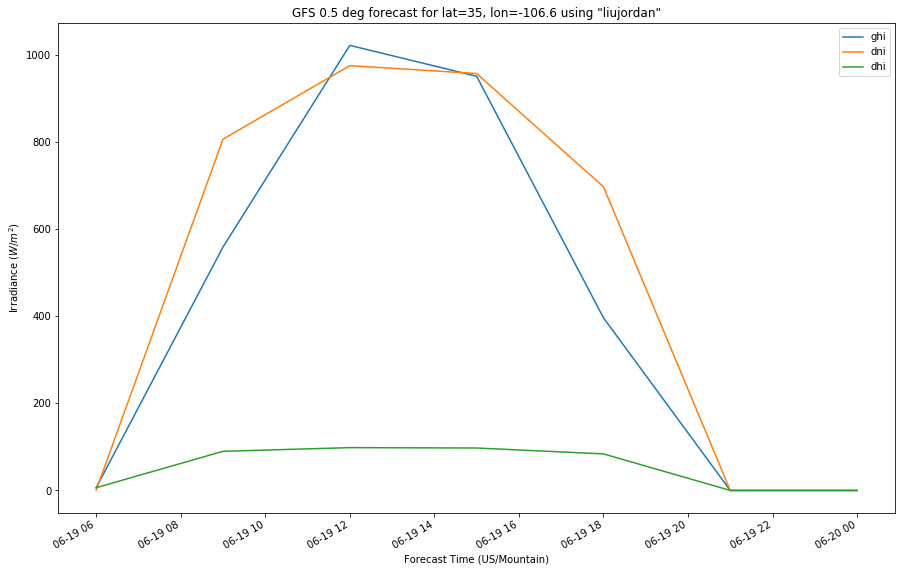

In [9]:
# Plot irradiance data
# Irradiance forecast one hour resolution as the weather data
irrads = model.cloud_cover_to_irradiance(data['total_clouds'], how='liujordan')
irrads.plot(figsize=(15,10));
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('GFS 0.5 deg forecast for lat={}, lon={} using "liujordan"'.format(latitude, longitude));
plt.legend();

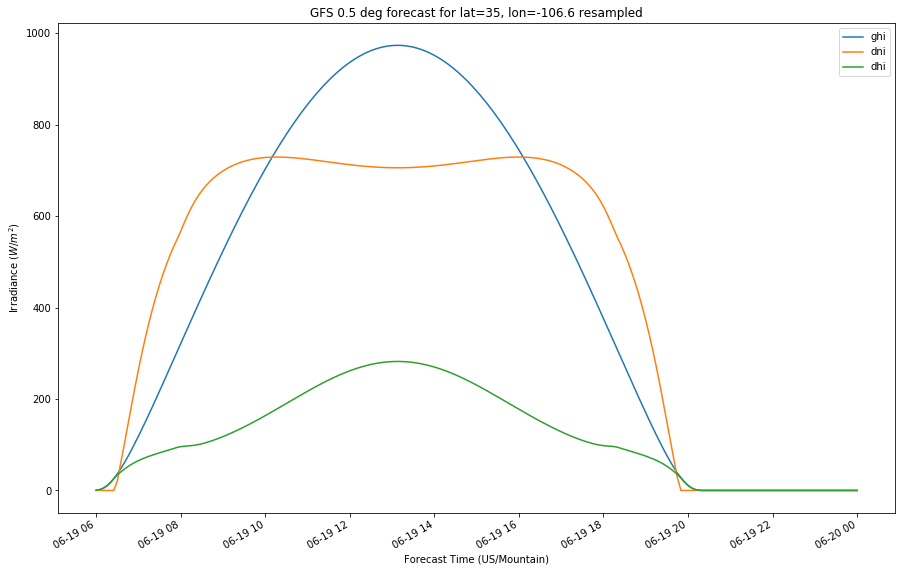

In [10]:
# Five min data resample
resampled_data = data.resample('5min').interpolate()
resampled_irrads = model.cloud_cover_to_irradiance(resampled_data['total_clouds'], how='clearsky_scaling')
resampled_irrads.plot(figsize=(15,10));
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('GFS 0.5 deg forecast for lat={}, lon={} resampled'.format(latitude,longitude));
plt.legend();

## Weather Models
### GFS
The Global Forecast System is the US model that provides forecast for the entire globe (6hr update)
### HRRR

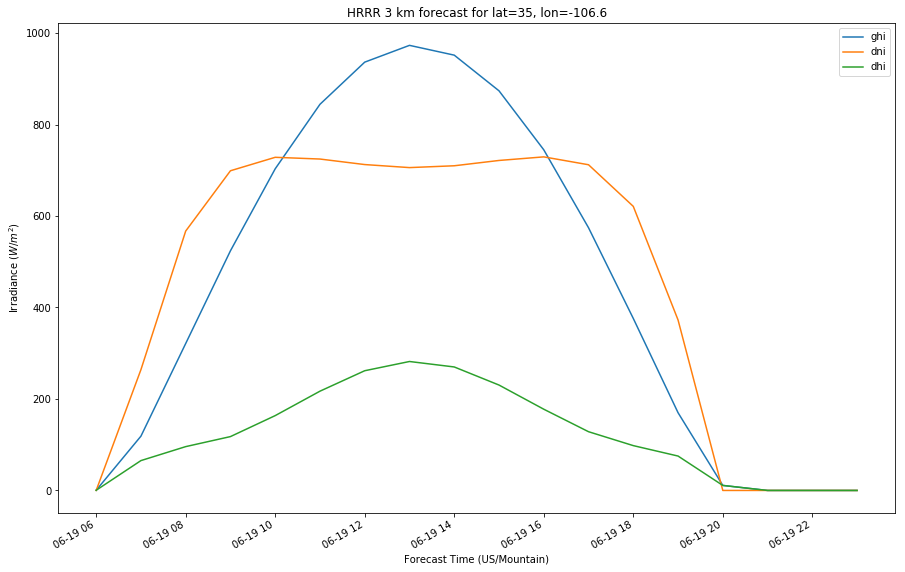

In [11]:
# High Resolution Rapid Refresh most accurate
# Only available for 15 hours
model = HRRR()
data = model.get_processed_data(latitude, longitude, start, end)
data[irrad_vars].plot(figsize=(15,10));
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('HRRR 3 km forecast for lat={}, lon={}'.format(latitude, longitude));
plt.legend();

In [12]:
hrrr_data=data[irrad_vars]

### RAP

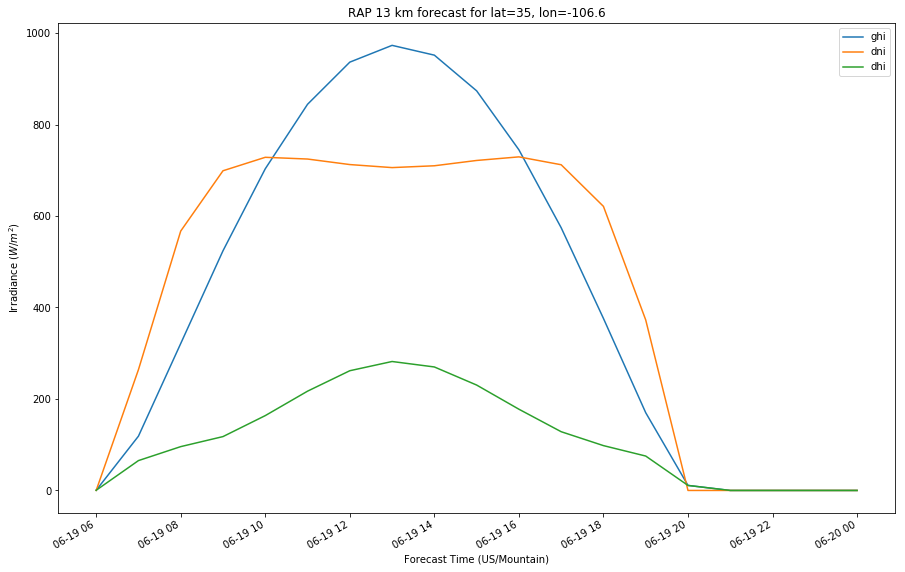

In [13]:
# The Rapid Refresh model is the parent model for the HRRR
# Updated every hour with a 20, 40 km resolution
model = RAP()
data = model.get_processed_data(latitude, longitude, start, end)
data[irrad_vars].plot(figsize=(15,10));
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('RAP 13 km forecast for lat={}, lon={}'.format(latitude, longitude));
plt.legend();

### NDFD

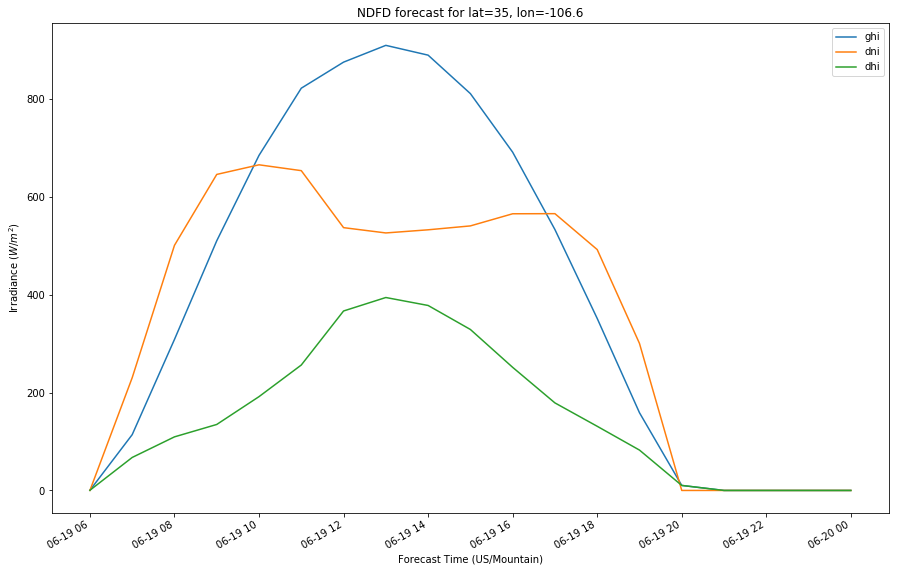

In [14]:
# The National Digital Forecast Database is not a model
# Is a collection of forecasts made by National Weather Service offices accross the country
# Updated every six hours
# Only available for the US
model = NDFD()
data = model.get_processed_data(latitude, longitude, start, end)
data[irrad_vars].plot(figsize=(15,10));
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('NDFD forecast for lat={}, lon={}'.format(latitude, longitude));
plt.legend();

# PV Power Forecast

In [15]:
from pvlib.pvsystem import PVSystem, retrieve_sam
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS
from pvlib.tracking import SingleAxisTracker
from pvlib.modelchain import ModelChain
from pvlib import pvsystem

sandia_modules = retrieve_sam('sandiamod')
cec_inverters = retrieve_sam('cecinverter')
module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
inverter = cec_inverters['iPower__SHO_5_2__240V_']
temperature_model_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

# model a big tracker for more fun
system = SingleAxisTracker(module_parameters=module, inverter_parameters=inverter, temperature_model_parameters=temperature_model_parameters, modules_per_string=15, strings_per_inverter=1)

# fx is a common abbreviation for forecast
fx_model = HRRR()
fx_data = fx_model.get_processed_data(latitude, longitude, start, end)
ac_data = fx_data.resample('5min').interpolate()

# use a ModelChain object to calculate modeling intermediates
mc = ModelChain(system, fx_model.location)

# extract relevant data for model chain
mc.run_model(ac_data)

ModelChain: 
  name: None
  orientation_strategy: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: sapm
  ac_model: snlinverter
  aoi_model: sapm_aoi_loss
  spectral_model: sapm_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

In [16]:
invdb = pvsystem.retrieve_sam('CECInverter')
invdb

,ABB__MICRO_0_25_I_OUTD_US_208__208V_,ABB__MICRO_0_25_I_OUTD_US_240__240V_,ABB__MICRO_0_3_I_OUTD_US_208__208V_,ABB__MICRO_0_3_I_OUTD_US_240__240V_,ABB__MICRO_0_3HV_I_OUTD_US_208__208V_,ABB__MICRO_0_3HV_I_OUTD_US_240__240V_,ABB__PVI_10_0_I_OUTD_x_US_208_y__208V_,ABB__PVI_10_0_I_OUTD_x_US_480_y_z__480V_,ABB__PVI_12_0_I_OUTD_x_US_480_y__480V_,ABB__PVI_3_0_OUTD_S_US__208V_,...,Zigor__Sunzet_3_TL_US__240V_,i_Energy__GT260__240V_,iPower__SHO_1_1__120V_,iPower__SHO_2_0__240V_,iPower__SHO_2_5__240V_,iPower__SHO_3_0__240V_,iPower__SHO_3_5__240V_,iPower__SHO_4_6__208V_,iPower__SHO_4_8__240V_,iPower__SHO_5_2__240V_
Vac,208,240,208,240,208,240,208,480,480,208,...,240,240,120,240,240,240,240,208,240,240
Pso,2.08961,2.24041,1.84651,1.95054,1.76944,1.84378,46.8638,67.7909,62.5547,18.1663,...,36.0334,2.5301,22.0954,24.4658,42.7765,31.682,64.7742,54.5701,85.1457,62.4867
Paco,250,250,300,300,300,300,10000,10000,12000,3000,...,3180,230,1100,2000,2500,3000,3500,4600,4800,5200
Pdco,259.589,259.492,311.669,311.581,312.421,312.005,10488.3,10296,12358.8,3142.3,...,3315.65,245.63,1194.09,2161.88,2632.84,3205.93,3641.84,4797.81,4968.03,5382.86
Vdco,40,40,40,40,45,45,320,362,370,310,...,375,40,182,199,218,222.5,263,254,263,280
C0,-4.1e-05,-3.9e-05,-3.3e-05,-3.4e-05,-4.5e-05,-3.5e-05,-2.7759e-06,-1.38839e-06,-1.009e-06,-8.03949e-06,...,-7.98467e-06,6.2e-05,-2.1e-05,-1.3e-05,-1.4e-05,-8.21046e-06,-9.08073e-06,-5.99928e-06,-6.16035e-06,-4.63524e-06
C1,-9.1e-05,-0.000132,-0.000192,-0.000256,-0.000196,-0.000227,-3.6e-05,-4.9e-05,-5.6e-05,-1.1e-05,...,-7.5e-05,-9.8e-05,5.7e-05,5.5e-05,6.1e-05,3.6e-05,3.5e-05,2.8e-05,3.4e-05,4.4e-05
C2,0.000494,0.002418,0.000907,0.002453,0.001959,-0.000526,0.000305,-0.00052,-0.001437,0.000999,...,0.000544,0.000231,0.002001,0.001703,0.002053,0.001708,0.001417,0.001381,0.000586,0.00126
C3,-0.013171,-0.014926,-0.031742,-0.028223,-0.023725,-0.041214,-0.002351,-0.003855,-0.007112,-0.000287,...,-0.000338,0.121032,0.000623,0.000315,0.00153,0.00086,0.001218,0.000889,0.000195,0.000367
Pnt,0.075,0.075,0.09,0.09,0.09,0.09,0.1,0.4,0.4,0.1,...,0.954,0.069,0.33,0.6,0.75,0.9,1.05,1.38,1.44,1.56


## ModelChain Attributes

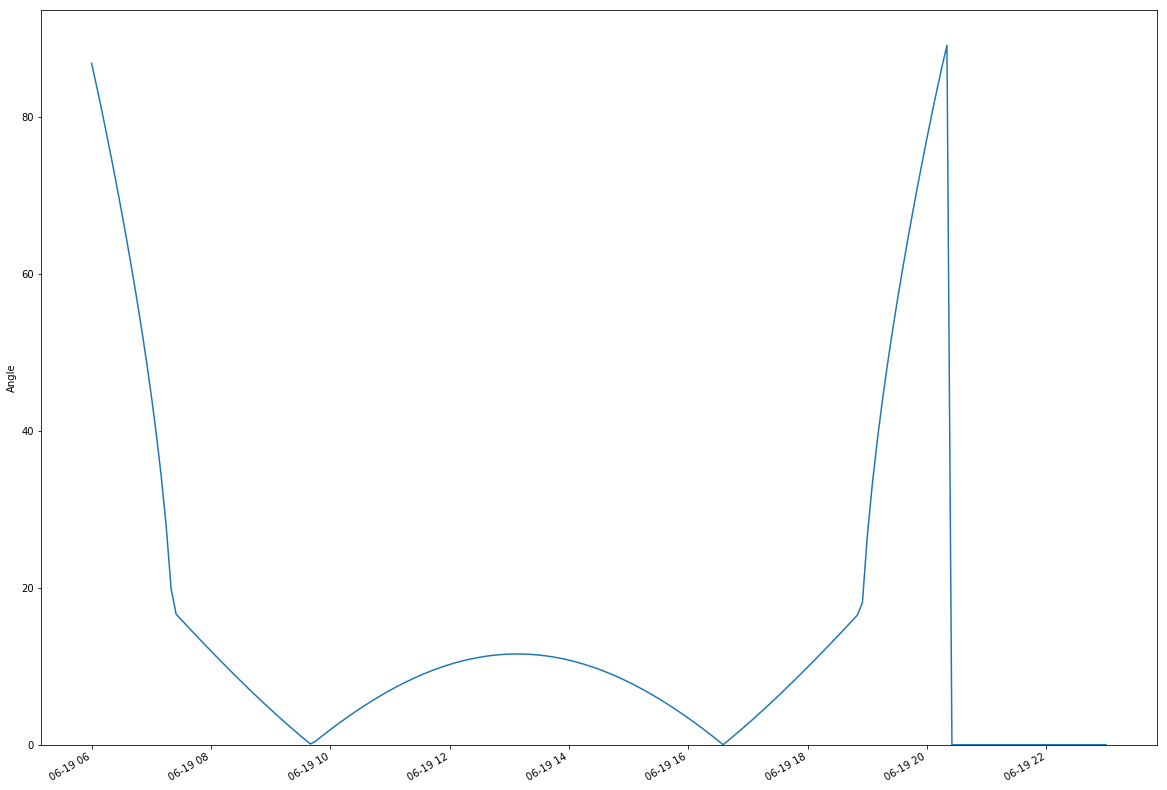

In [17]:
# ModelChain sotres modeling results on a series of attributes. 
# Angle of Incidence
mc.aoi.fillna(0).plot(figsize=(20,15));
plt.ylim(0, None);
plt.ylabel('Angle');

## Modeling intermediates & Forecast power

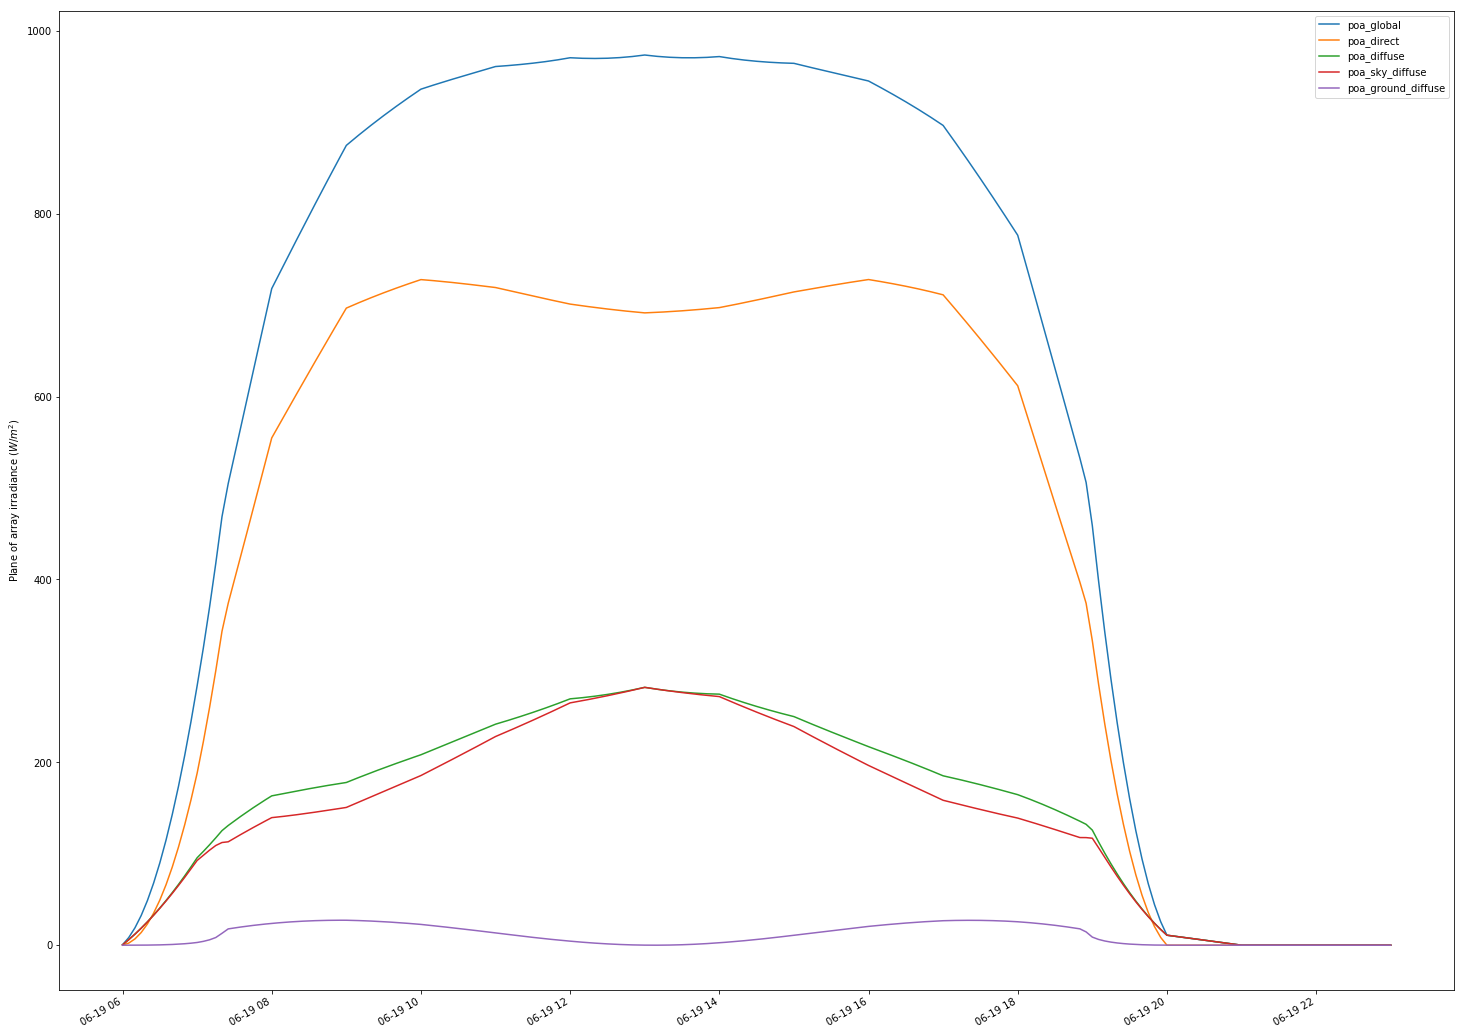

In [18]:
mc.total_irrad.plot(figsize=(25,20));
plt.ylabel('Plane of array irradiance ($W/m^2$)');
plt.legend(loc='best');

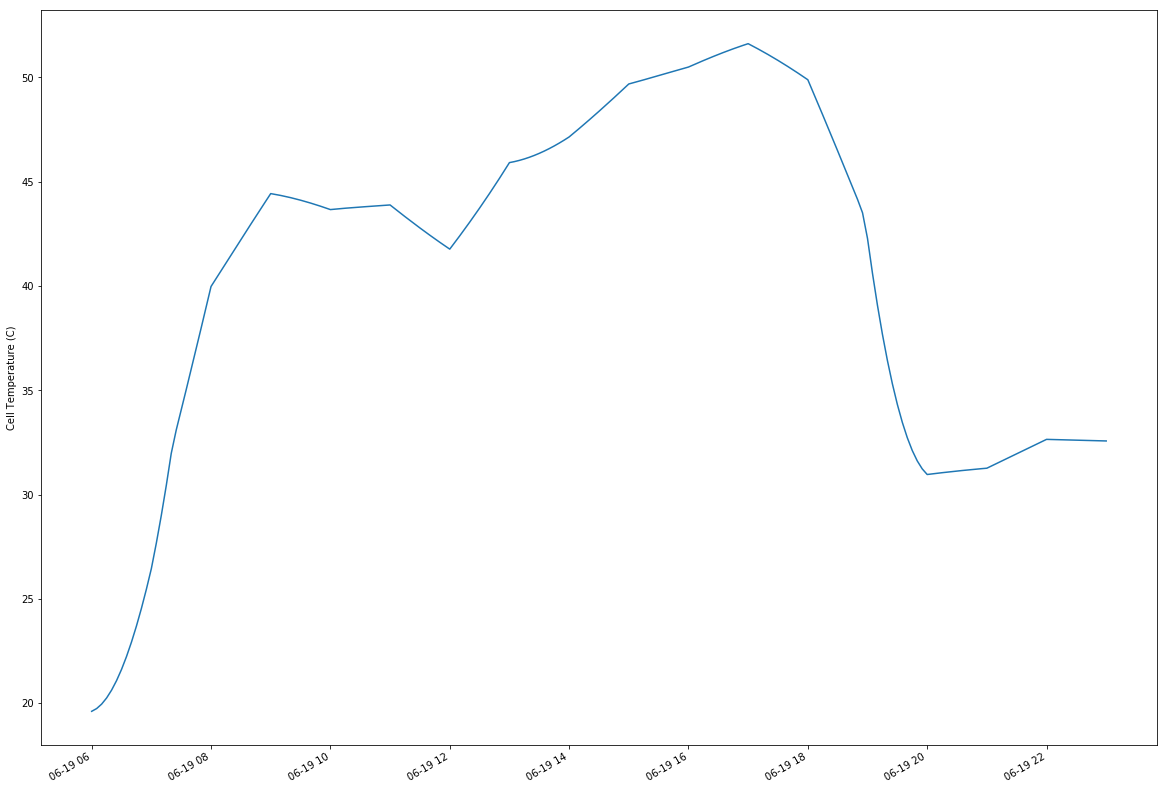

In [19]:
# Cell and module temperature
mc.cell_temperature.plot(figsize=(20,15));
plt.ylabel('Cell Temperature (C)');

## MC DC Power

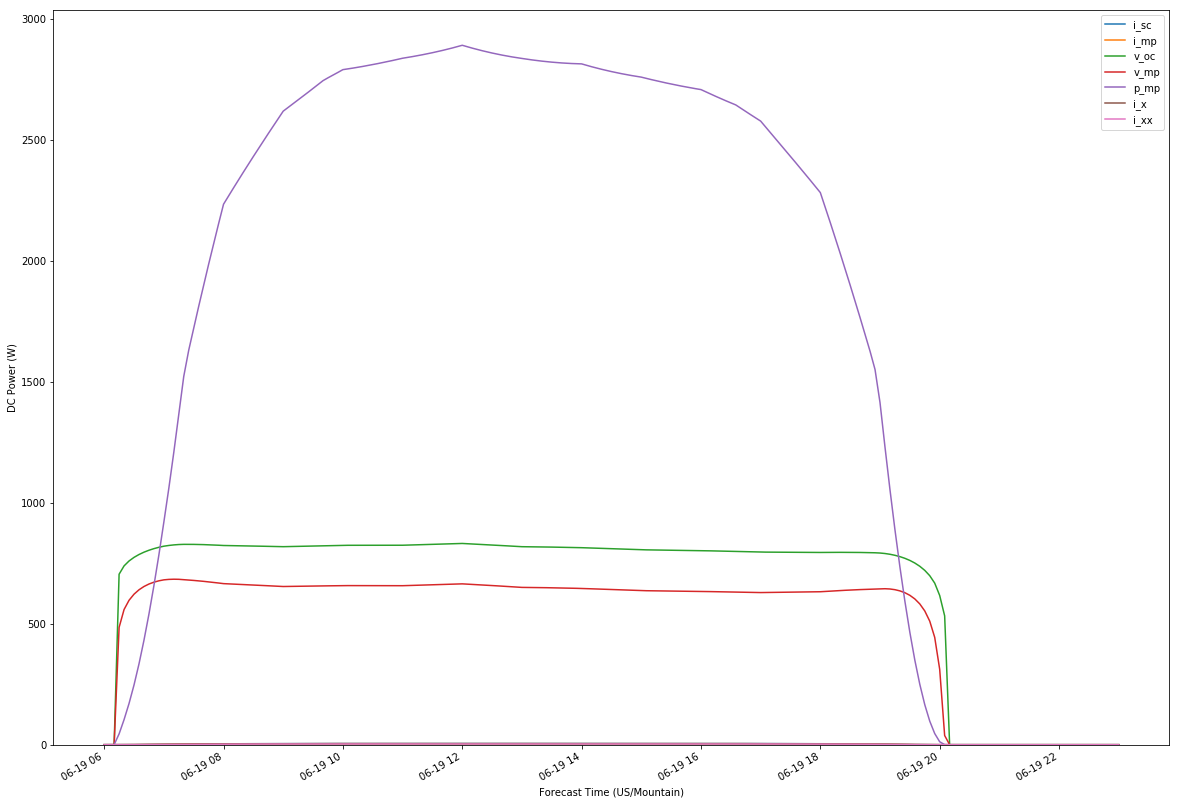

In [20]:
mc.dc.fillna(0).plot(figsize=(20,15));
plt.ylim(0, None);
plt.ylabel('DC Power (W)');
plt.xlabel('Forecast Time ({})'.format(tz));

In [21]:
mc.dc.describe()

,i_sc,i_mp,v_oc,v_mp,p_mp,i_x,i_xx
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,3.785356,3.371245,776.675401,616.234066,2185.590413,3.697976,2.419562
std,1.587657,1.409573,151.727035,131.559182,914.206083,1.552015,0.987218
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.297193,2.950143,795.360036,633.456018,1899.164298,3.218541,2.178672
50%,4.671867,4.154574,813.504511,646.763492,2661.273610,4.564743,2.966029
75%,4.861457,4.326317,823.428890,657.528131,2807.734488,4.750573,3.069505
max,4.904678,4.362644,831.703201,683.927607,2890.610154,4.792977,3.092515


In [22]:
mc.dc.fillna(0).to_csv('DC June 19.csv', encoding='utf-8')

## MC AC Power

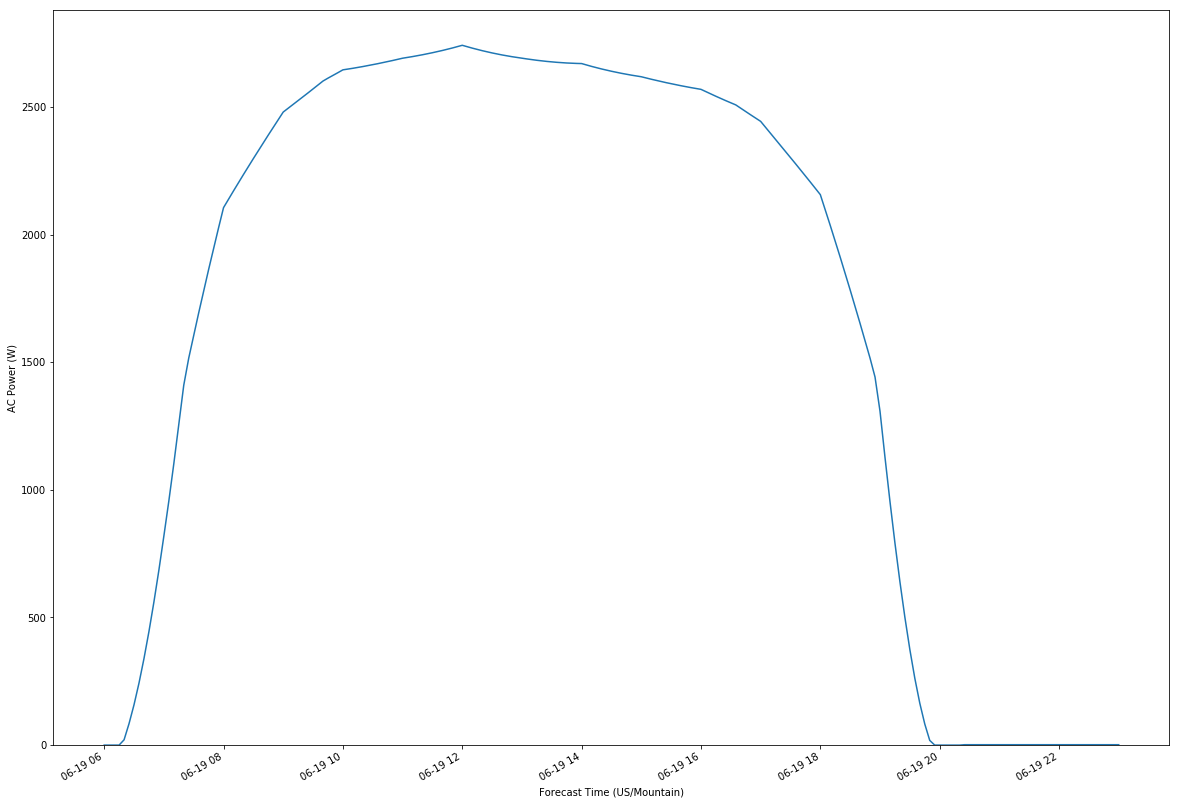

In [23]:
# AC Power
mc.ac.fillna(0).plot(figsize=(20,15));
plt.ylim(0, None);
plt.ylabel('AC Power (W)');
plt.xlabel('Forecast Time ({})'.format(tz));

In [24]:
mc.ac.describe()

count     173.000000
mean     2061.101896
std       884.364337
min        -1.560000
25%      1782.673558
50%      2524.706424
75%      2664.560901
max      2741.854162
dtype: float64

In [25]:
mc.ac.fillna(0)

2020-06-19 06:00:00-06:00      -1.560000
2020-06-19 06:05:00-06:00      -1.560000
2020-06-19 06:10:00-06:00      -1.560000
2020-06-19 06:15:00-06:00      -1.560000
2020-06-19 06:20:00-06:00      19.209321
2020-06-19 06:25:00-06:00      82.648812
2020-06-19 06:30:00-06:00     156.583884
2020-06-19 06:35:00-06:00     241.542910
2020-06-19 06:40:00-06:00     337.381340
2020-06-19 06:45:00-06:00     443.543049
2020-06-19 06:50:00-06:00     559.361841
2020-06-19 06:55:00-06:00     684.247174
2020-06-19 07:00:00-06:00     817.735196
2020-06-19 07:05:00-06:00     955.253663
2020-06-19 07:10:00-06:00    1101.205570
2020-06-19 07:15:00-06:00    1253.979819
2020-06-19 07:20:00-06:00    1409.131693
2020-06-19 07:25:00-06:00    1515.288154
2020-06-19 07:30:00-06:00    1604.716119
2020-06-19 07:35:00-06:00    1692.443207
2020-06-19 07:40:00-06:00    1778.461299
2020-06-19 07:45:00-06:00    1862.767330
2020-06-19 07:50:00-06:00    1945.362487
2020-06-19 07:55:00-06:00    2026.251804
2020-06-19 08:00

In [26]:
mc.ac.fillna(0).to_csv('AC June 19.csv', encoding='utf-8')

### HRRR Irradiance Data

In [27]:
hrrr_data

,ghi,dni,dhi
2020-06-19 06:00:00-06:00,0.402484,0.000000,0.402484
2020-06-19 07:00:00-06:00,118.664932,264.064546,65.272057
2020-06-19 08:00:00-06:00,321.198158,567.056508,95.809459
2020-06-19 09:00:00-06:00,523.946401,698.891855,117.747131
2020-06-19 10:00:00-06:00,703.201820,728.314404,163.609078
2020-06-19 11:00:00-06:00,844.190000,724.531917,217.024550
2020-06-19 12:00:00-06:00,936.363937,712.448625,261.736739
2020-06-19 13:00:00-06:00,973.056512,705.807356,281.904457
2020-06-19 14:00:00-06:00,951.649031,709.802112,269.968847
2020-06-19 15:00:00-06:00,873.667649,721.418978,230.427267


In [28]:
hrrr_data.to_csv('HRRR June 19.csv', encoding='utf-8')